In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from mlxtend.evaluate import bias_variance_decomp
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
from sklearn.svm import SVR

**Train Test Split**

In [2]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(16))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    shuffle=True)


In [57]:
# X_train= X_train.reshape(-1, 1)
# y_train= y_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=None) 


In [9]:
bias_clf, var_clf,mse_clf, = [], [], []
alpha_list = [i for i in np.arange(0.0001, 0.01, 0.0001)]
for alp in alpha_list:
    clf = KernelRidge(kernel = 'rbf', alpha = alp)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    mse, bias, var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=123)
    bias_clf.append(bias)
    var_clf.append(var)
    mse_clf.append(mse)


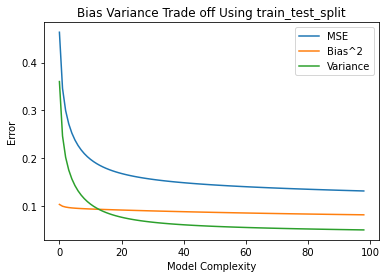

In [10]:
plt.plot(mse_clf, label = 'MSE')
plt.plot(bias_clf, label = 'Bias^2')
plt.plot(var_clf, label = 'Variance')
plt.legend()
plt.title('Bias Variance Trade off Using train_test_split')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# plt.scatter(X_test, y_test, s=30, edgecolor="black", c="grey", label="data")
# plt.plot(X_test, pred_train, label=alp)

In [16]:
# run train test split on real data
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    shuffle=True)
bias_clf, var_clf,mse_clf, = [], [], []
# alpha_list = [i for i in np.arange(100000, 10000000000, 5000000)]
alpha_list = [100000, 150000, 1000000, 1500000, 10000000, 100000000, 10000000000, 1000000000000]
for alp in alpha_list:
    clf = KernelRidge(kernel = 'polynomial', alpha = alp)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    mse, bias, var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
    bias_clf.append(bias)
    var_clf.append(var)
    mse_clf.append(mse)

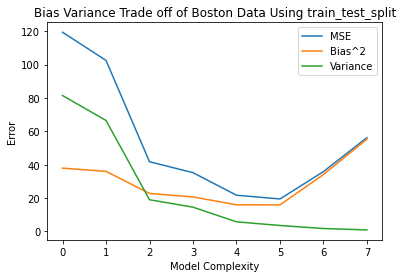

In [17]:
plt.plot(mse_clf, label = 'MSE')
plt.plot(bias_clf, label = 'Bias^2')
plt.plot(var_clf, label = 'Variance')
plt.legend()
plt.title('Bias Variance Trade off of Boston Data Using train_test_split')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# plt.scatter(X_test, y_test, s=30, edgecolor="black", c="grey", label="data")
# plt.plot(X_test, pred_train, label=alp)


**Run again for K fold**

In [2]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [4]:
kf = RepeatedKFold(n_splits=2, n_repeats=1, random_state=None) 

for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

In [40]:
bias_clf, var_clf,mse_clf, = [], [], []
alpha_list = [i for i in np.arange(0.00001, 0.0001, 0.0000005)]
for alp in alpha_list:
    clf = KernelRidge(kernel = 'rbf', alpha = alp)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    mse, bias, var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=123)
    bias_clf.append(bias)
    var_clf.append(var)
    mse_clf.append(mse)


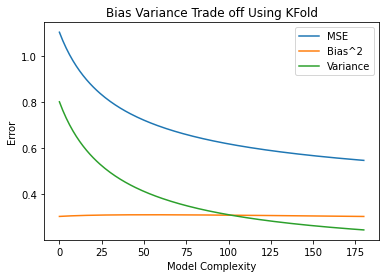

In [41]:
plt.plot(mse_clf, label = 'MSE')
plt.plot(bias_clf, label = 'Bias^2')
plt.plot(var_clf, label = 'Variance')
plt.title('Bias Variance Trade off Using KFold')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

In [48]:
# plt.scatter(X_test, y_test, s=30, edgecolor="black", c="grey", label="data")
# plt.plot(X_test, pred_train, label=alp)

In [2]:
# run KFold on real data
boston = load_boston()
X, y = boston.data, boston.target
kf = RepeatedKFold(n_splits=2, n_repeats=1, random_state=None) 

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
bias_clf, var_clf,mse_clf, = [], [], []
# alpha_list = [i for i in np.arange(100000, 1000000000000, 10000000)]
alpha_list = [10000, 100000, 150000, 1000000, 1500000, 10000000, 100000000, 10000000000, 1000000000000]
for alp in alpha_list:
    clf = KernelRidge(kernel = 'polynomial', alpha = alp)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    mse, bias, var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
    bias_clf.append(bias)
    var_clf.append(var)
    mse_clf.append(mse)

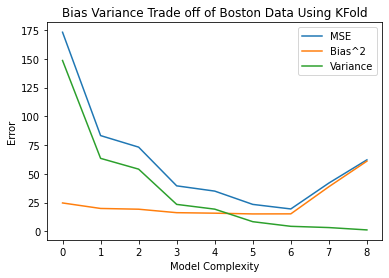

In [3]:
plt.plot(mse_clf, label = 'MSE')
plt.plot(bias_clf, label = 'Bias^2')
plt.plot(var_clf, label = 'Variance')
plt.title('Bias Variance Trade off of Boston Data Using KFold')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

**Run again for LOO**

In [27]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [28]:
loo = LeaveOneOut()
loo.get_n_splits(X)

80

In [29]:
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [30]:
# X_train= X_train.reshape(-1, 1)
# y_train= y_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)

In [31]:
bias_clf, var_clf,mse_clf, = [], [], []
alpha_list = [i for i in np.arange(0.01, 2, 0.01)]
for alp in alpha_list:
    clf = KernelRidge(kernel = 'rbf', alpha = alp)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    mse, bias, var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=123)
    bias_clf.append(bias)
    var_clf.append(var)
    mse_clf.append(mse)


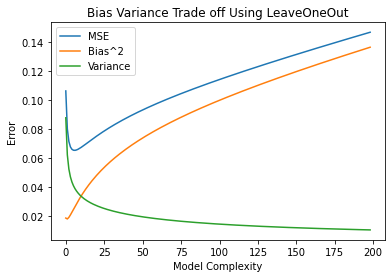

In [32]:
plt.plot(mse_clf, label = 'MSE')
plt.plot(bias_clf, label = 'Bias^2')
plt.plot(var_clf, label = 'Variance')
plt.title('Bias Variance Trade off Using LeaveOneOut')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

In [15]:
# run LOO on real data
boston = load_boston()
X, y = boston.data, boston.target
loo = LeaveOneOut()
loo.get_n_splits(X)

506

In [16]:
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [24]:
bias_clf, var_clf,mse_clf, = [], [], []
# alpha_list = [i for i in np.arange(0.01, 2, 0.01)]
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10000, 100000, 150000, 1000000, 100000000]
for alp in alpha_list:
    clf = KernelRidge(kernel = 'polynomial', alpha = alp)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    mse, bias, var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
    bias_clf.append(bias)
    var_clf.append(var)
    mse_clf.append(mse)

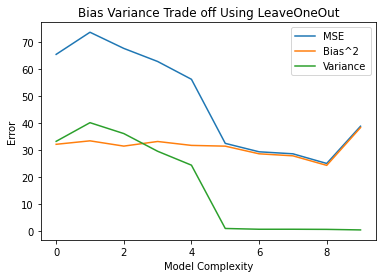

In [25]:
plt.plot(mse_clf, label = 'MSE')
plt.plot(bias_clf, label = 'Bias^2')
plt.plot(var_clf, label = 'Variance')
plt.title('Bias Variance Trade off of Boston Data Using LeaveOneOut')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# alpha_list = [i for i in np.arange(0.001, 2, 0.001)]
# training_accuracy = []
# variance_list = []
# bias_list = []
# mse_list = []
# for alp in alpha_list:
#     clf = KernelRidge(kernel = 'rbf', alpha = alp)
#     clf.fit(X_train, y_train)
#     pred_train = clf.predict(X_train)
#     scores = clf.score(y_train, pred_train)
#     training_accuracy.append(scores)
#     variance = np.var(pred_train)
#     variance_list.append(variance)
#     bias = (np.mean((np.mean(pred_train) - y)**2) - variance)*2
#     bias_list.append(bias)
#     mse = bias + variance
#     mse_list.append(mse)

**SVM**

In [2]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(16))

In [11]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
pred = svr_rbf.fit(X, y).predict(X)

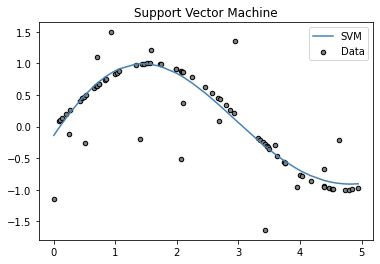

In [19]:
plt.scatter(X, y, s=20, edgecolor="black", c="grey", label = 'Data')
plt.plot(X, pred, color = 'steelblue', label='SVM')
plt.title('Support Vector Machine')
# plt.xlabel('Model Complexity')
# plt.ylabel('Error')
plt.legend()
plt.show()